# In this notebook, I modify the k = 1 : Nearest neighbor algorithm to include k = n, where n =  max number of training datapoints

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Here I create the DataFrame that includes the number of rooms, suburb and house price.  I created a simple dataframe that shows how the number of rooms and price are related to the suburb.  There are two suburbs, Sandton (upmarket) and East Town (ET) (middle class).  The aim is to develop a nearest neighbor algorithm so that if we insert a new price (test data) we can predict which suburb the house is in.

In [2]:
housing = pd.DataFrame({'Rooms': [7,6,2,3,8,2,6,4,5,4],
                       'Suburb': ['Sandton','Sandton','ET','ET','Sandton','ET','Sandton','ET','Sandton','ET'],
                       'Price':[4.5,4.1,1.1,1.5,5,1.2,4,1.8,3.9,1.9]})
housing

,Rooms,Suburb,Price
0,7,Sandton,4.5
1,6,Sandton,4.1
2,2,ET,1.1
3,3,ET,1.5
4,8,Sandton,5.0
5,2,ET,1.2
6,6,Sandton,4.0
7,4,ET,1.8
8,5,Sandton,3.9
9,4,ET,1.9


# Next I plot the number of rooms for each house and the corresponding house price

Text(0,0.5,'House price [R-mill]')

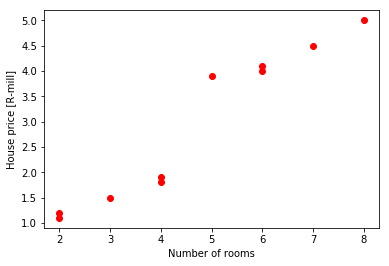

In [3]:
plt.plot(housing.Rooms, housing.Price, 'ro')
plt.xlabel('Number of rooms'); plt.ylabel('House price [R-mill]')

# Next I create a function called euc_dist that calculated the distance between the test point and each point in the dataset

# Afterwards, this function adds a new column called Distance 

In [15]:
## This function calculates the Euclidean distance between the test point and the existing points.
## It is limited to a single axis
## It further adds a column onto "housing" called Distance.
def euc_dist(x):
    for i in housing.index:
          housing['Distance'][i] = np.sqrt((x-housing.Price[i])**2)
    return housing


# Next I test it with random input values

In [17]:
euc_dist(1)



C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rooms,Suburb,Price,Distance
0,7,Sandton,4.5,3.5
1,6,Sandton,4.1,3.1
2,2,ET,1.1,0.1
3,3,ET,1.5,0.5
4,8,Sandton,5.0,4.0
5,2,ET,1.2,0.2
6,6,Sandton,4.0,3.0
7,4,ET,1.8,0.8
8,5,Sandton,3.9,2.9
9,4,ET,1.9,0.9


In [18]:
print('Using 1 Nearest Neighbor, the Suburb is {}'.format(housing.loc[housing.Distance == min(housing.Distance), 'Suburb']))


Using 1 Nearest Neighbor, the Suburb is 2    ET
Name: Suburb, dtype: object


# The next aim is to take the above code and create a single function that can do all of the above

In [19]:
def one_nearest_neighbor(x, column):   ## x is the input price test value;  column is the price column inserted by the user
    for i in housing.index:
          housing['Distance'][i] = np.sqrt((x-housing[column][i])**2)
    print('Using 1 Nearest Neighbor, the Suburb is {}'.format(housing.loc[housing.Distance == min(housing.Distance), 'Suburb']))
    return housing

In [64]:
## Here we test the function
one_nearest_neighbor(6,'Price')

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Using 1 Nearest Neighbor, the Suburb is 4    Sandton
Name: Suburb, dtype: object


,Rooms,Suburb,Price,Distance
0,7,Sandton,4.5,1.5
1,6,Sandton,4.1,1.9
2,2,ET,1.1,4.9
3,3,ET,1.5,4.5
4,8,Sandton,5.0,1.0
5,2,ET,1.2,4.8
6,6,Sandton,4.0,2.0
7,4,ET,1.8,4.2
8,5,Sandton,3.9,2.1
9,4,ET,1.9,4.1


In [65]:
sortHousing = housing.sort_values('Distance', ascending = True)
sortHousing.reset_index(inplace = True)

In [66]:
k = 3
sol =sortHousing.loc[0:k-1, 'Suburb']
max(sol)

'Sandton'

In [54]:
sortHousing.index

Int64Index([2, 5, 3, 7, 9, 8, 6, 1, 0, 4], dtype='int64')